Total vertical transport at a specific depth
==

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
# Functions
def vertTrans(Mask, W,zlim=30):
    mask_expand = np.expand_dims(Mask[zlim,:,:],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,:,:].shape)

    vert = W[:,zlim,:,:]
    VertTrans= np.sum(np.sum(np.ma.masked_array(vert,mask = mask_expand),axis=1),axis=1)
    return VertTrans


In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
NoCCanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
NoCCanyonStateOut = Dataset(NoCCanyonState)




In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells

yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')



In [6]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
FluxBase = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc' 
FluxOutBase = Dataset(FluxBase)

FluxBaseNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/FluxTR01Glob.nc' 
FluxOutBaseNoC = Dataset(FluxBaseNoC)


In [8]:
# TRACER 1

FluxTR013d4 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc' 
FluxOut13d4 = Dataset(FluxTR013d4)

FluxTR013d5 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc' 
FluxOut13d5 = Dataset(FluxTR013d5)

FluxTR013d6 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc' 
FluxOut13d6 = Dataset(FluxTR013d6)

FluxTR013d7 = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/FluxTR01Glob.nc' 
FluxOut13d7 = Dataset(FluxTR013d7)

FluxTR01CNT9 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR01Glob.nc' 
FluxOut1CNT9 = Dataset(FluxTR01CNT9)

FluxTR02CNT9 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR02Glob.nc' 
FluxOut2CNT9 = Dataset(FluxTR02CNT9)

FluxTR03CNT9 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run09/FluxTR03Glob.nc' 
FluxOut3CNT9 = Dataset(FluxTR03CNT9)


In [9]:
WTRACbase = rout.getField(FluxBase,'WTRAC01') #

WTRACbaseNoC = rout.getField(FluxBaseNoC,'WTRAC01') #

WTRAC04 = rout.getField(FluxTR013d4,'WTRAC01') # 

WTRAC06 = rout.getField(FluxTR013d6,'WTRAC01') # 

WTRAC07 = rout.getField(FluxTR013d7,'WTRAC01') # 

WTRACTr109 = rout.getField(FluxTR01CNT9,'WTRAC01') # 

WTRACTr209 = rout.getField(FluxTR02CNT9,'WTRAC02') # 

WTRACTr309 = rout.getField(FluxTR03CNT9,'WTRAC03') #

In [12]:
vert04 = vertTrans(MaskC,WTRAC04,zlim=30)
vert06 = vertTrans(MaskC,WTRAC06,zlim=30)
vert07 = vertTrans(MaskC,WTRAC07,zlim=30)
vertTr109 = vertTrans(MaskC,WTRACTr109,zlim=30)
vertTr209 = vertTrans(MaskC,WTRACTr209,zlim=30)
vertTr309 = vertTrans(MaskC,WTRACTr309,zlim=30)
vertBase = vertTrans(MaskC,WTRACbase,zlim=30)
vertBaseNoC = vertTrans(MaskCNoC,WTRACbaseNoC,zlim=30)



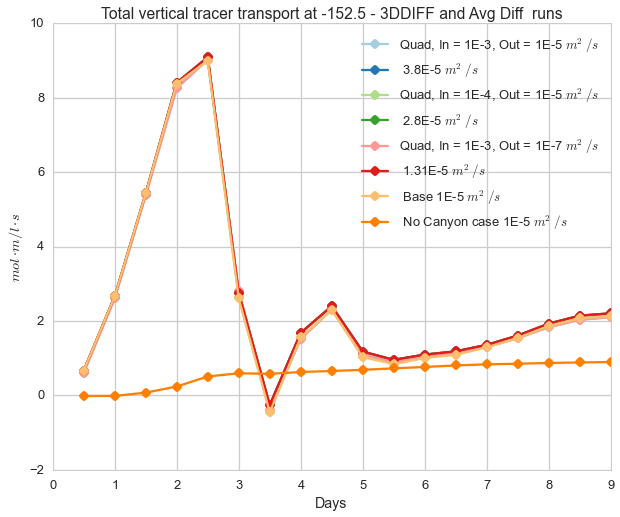

In [14]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [time/2.0+0.5 for time in times]

figSize=(10,8)
numCols = 1
numRows = 1

unitsTr = '$mol \cdot m /l \cdot s$'

with sns.color_palette("Paired", 8):
    fig44 = plt.figure(figsize=figSize)
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,(vert06),'o-',label = 'Quad, In = 1E-3, Out = 1E-5 $m^2/s$')
    ax.plot(times,(vertTr109),'o-',label = ' 3.8E-5 $m^2/s$')
    ax.plot(times,(vert07),'o-',label = 'Quad, In = 1E-4, Out = 1E-5 $m^2/s$')
    ax.plot(times,(vertTr209),'o-',label = ' 2.8E-5 $m^2/s$')
    ax.plot(times,(vert04),'o-',label = 'Quad, In = 1E-3, Out = 1E-7 $m^2/s$')
    ax.plot(times,(vertTr309),'o-',label = ' 1.31E-5 $m^2/s$')
    ax.plot(times,(vertBase),'o-',label = ' Base 1E-5 $m^2/s$')
    ax.plot(times,(vertBaseNoC),'o-',label = ' No Canyon case 1E-5 $m^2/s$')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3,4,5,6,7)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display],loc=0)
   
    
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total vertical tracer transport at %0.1f - 3DDIFF and Avg Diff  runs' %z[30])
    

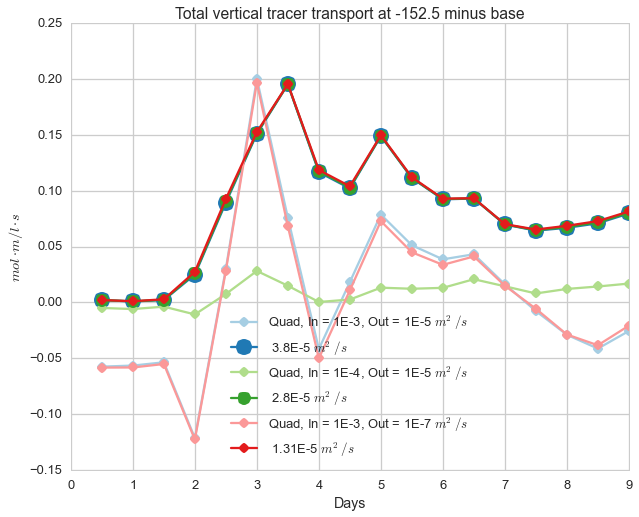

In [18]:
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1)

times = range(18)# # First time element of flux is at 43200 sec, and las at 8 days 
times = [time/2.0+0.5 for time in times]

figSize=(10,8)
numCols = 1
numRows = 1

unitsTr = '$mol \cdot m /l \cdot s$'

with sns.color_palette("Paired", 7):
    fig44 = plt.figure(figsize=figSize)
    plt.subplot(numRows,numCols,1)
    ax = plt.gca()
    ax.plot(times,(vert06-vertBase),'o-',label = 'Quad, In = 1E-3, Out = 1E-5 $m^2/s$')
    ax.plot(times,(vertTr109-vertBase),'o-',markersize=16,label = ' 3.8E-5 $m^2/s$')
    ax.plot(times,(vert07-vertBase),'o-',label = 'Quad, In = 1E-4, Out = 1E-5 $m^2/s$')
    ax.plot(times,(vertTr209-vertBase),'o-',markersize=13,label = ' 2.8E-5 $m^2/s$')
    ax.plot(times,(vert04-vertBase),'o-',label = 'Quad, In = 1E-3, Out = 1E-7 $m^2/s$')
    ax.plot(times,(vertTr309-vertBase),'o-',label = ' 1.31E-5 $m^2/s$')
    
    handles, labels = ax.get_legend_handles_labels()
    display = (0,1,2,3,4,5,6)
    ax.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display],loc=0)
   
    
    plt.xlabel('Days')
    plt.ylabel(unitsTr)
    plt.title('Total vertical tracer transport at %0.1f minus base' %z[30])
    